<h2 align=center> Principal Component Analysis</h2>

### Load the Data and Libraries
---

In [4]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [5]:
#using the plot type to be used in this project and selecting the dimensions.
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [8]:
#reading dataset
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
iris=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                header=None) #as data has no header in it.
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#naming columns

iris.columns= ['sepal_length', 'sepal_width','petal_length','petal_width','species']
iris.dropna(how='all',inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


###  Visualize the Data
---

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

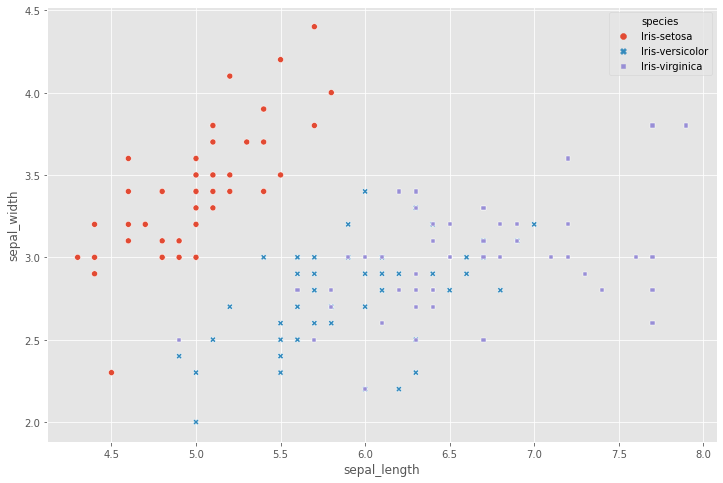

In [11]:
#we visualize the data graphically using scatter plot
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width,hue=iris.species, style =iris.species)

#we found that , we have difficulty in seperating the crosses and squares as they are almost of same color, like that is difficult to seperate.

###  Standardize the Data
---

In [16]:
X= iris.iloc[:,0:4].values
y= iris.species.values
print(X)
print(y)
#to retrieve rows from a Data frame. Dataframe.iloc[] method is used when the index label of a data frame is something other than numeric series of 0, 1, 2, 3….n or in case the user doesn’t know the index label. Rows can be extracted using an imaginary index position which isn’t visible in the data frame.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [20]:
# we do it by zeroing out the mean and scaling the data to a unit variance and all of these can be achieved using sklearn preprocessing StandardScalar helper function.  
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)


###  Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [25]:
#compute the eigen vectors which are going to be principle components of the covariance matrix. 
covariance_matrix= np.cov(X.T)
print('Covarince matrix: \n', covariance_matrix)

#covariance matrix is simple matrix of pairwise corelations and one thing to note is that your covariance matrix is symmetric and positive semi definite. 

Covarince matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [31]:
#this allows us to decompose the covariance matrix into this form(see above formula) where,
#W is matrix of eigen vectors , 
#lambda is diagonal matrix that contains in its principal diagonal ,all the eigen values correspond to eigen vectors.
# W^(-1) is just the inverse of eigen vector matrix.

eigen_values, eigen_vectors =np.linalg.eig(covariance_matrix)

print(f'Eigenvectors: \n {eigen_vectors} \n')
print(f'Eigenvalues: \n {eigen_values} \n')

#we used numpy's really helpful function  linalg.eig() to calculate eigen vector and eigen values.

Eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601] 



###  Singular Value Decomposition (SVD)
---

In [47]:
#showing alternative way to calculate eigen vector and eigen values using SVD.
eigen_vec_svd,s,v =np.linalg.svd(X.T)
print(eigen_vec_svd)

#they gave us same result just that they differ in thier signs(efficiency) and that really doesnt matter as we gonna get that on same axis if it is positive or negative direction sign. and further calc will not differ by this.

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


### Picking Principal Components Using the Explained Variance
---

In [33]:
#once we calc our principal component and their corresponding eigen values we need a way to select a subset of those principle component: 


for val in eigen_values:
    print(val)

2.930353775589315
0.9274036215173407
0.1483422264816398
0.02074601399559622


In [34]:
variance_explained= [(i/sum(eigen_values))*100 for i in eigen_values]
print(variance_explained)

#multiplied by 100 to get percentage.
#so the first 2 has major part then others .

[72.77045209380134, 23.030523267680632, 3.683831957627389, 0.5151926808906395]


In [35]:
#here we are just adding 1st element to second one and then to third and then to 4th at last .

cumulative_variance_explained=np.cumsum(variance_explained)
print(cumulative_variance_explained)

#as we can see the first alone has 72.77% of variance in data and both 1st and second has 95.8% together and third has altogether 99.48 % and yup the last one is ummation of all ofcourse will give 100% .
#so the major % of variance is shown by 1st and then 2nd so we will take them i account. as both able to capture 95.8% of data.
#and in general its convention to use 95% explained variance.

[ 72.77045209  95.80097536  99.48480732 100.        ]


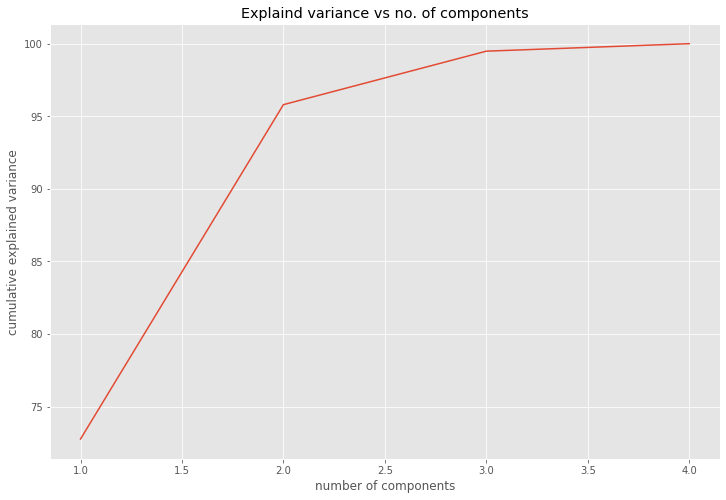

In [39]:
#lets visulaize it
sns.lineplot(x=[1,2,3,4], y=cumulative_variance_explained)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explaind variance vs no. of components')
plt.show()

#  Project Data Onto Lower-Dimensional Linear Subspace

Xpca = X.W

In [40]:
print(eigen_vectors)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [42]:
#we just wannt first 2 columns as they have variance more than 95% together.
projection_matrix= (eigen_vectors.T[:][:])[:2].T
print(f'projection matrix : \n {projection_matrix}')

projection matrix : 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [52]:
X_pca = X.dot(projection_matrix) #i.e X.W 

#in place of projected_matrix you can also write eigen_vectors (i.e. W), no difference will come.

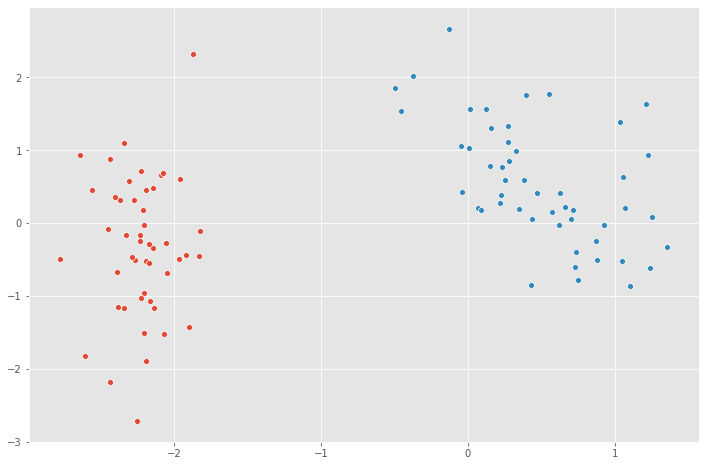

In [53]:
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-verginica'):
    sns.scatterplot(X_pca[y==species,0],
                   X_pca[y==species,1])

we r looking for computational efficient method to work with data , so one way to do that would be to perform pca on it ,
choose a small no. of components that explain a satisfactory percentage of variance in your origional data 
then use that as a input for your classification algorithm. 
